# **Proyecto final. Optimización**

#### Gonzales-Valadez Ulises Aldair, Segura-Gómez Guillermo

#### **Centro de Investigación en Matemáticas**

## **Título**: Globally linearly convergent nonlinear conjugate gradients without Wolfe line search

##### **Autores:** Arnold Neumaier, Morteza Kimiaei, Behzad Azmi

### **Resumen**

El artículo introduce un nuevo método de gradiente conjugado no lineal (CG) que no requiere la condición de Wolfe para la búsqueda de líneas. Este método es globalmente convergente a un punto estacionario para funciones objetivo diferenciables con gradiente Lipschitz continuo y es linealmente convergente si este punto estacionario es un minimizador local fuerte. También se presenta una medida para la fuerza de zigzag y una dirección mínima de zigzag. El método propuesto es competitivo con los mejores métodos CG no lineales del 
estado del arte según resultados numéricos en problemas de prueba CUTEst.

### **Conceptos básicos**

Primero vamos a definir los conceptos importantes para entender el artículo. 

#### Métodos de Gradiente Conjugado No Lineal

El método del gradiente conjugado no lineal es una extensión del método del gradiente conjugado utilizado 
para resolver problemas de optimización no lineales. 

  + **Optimización No Lineal**: Es el proceso de encontrar el mínimo (proceso de optimización) de una función objetivo $f(x)$ que no necesariamente es una función cuadrática. Es decir, la función $f(x)$ puede tener una forma más compleja y no tiene que ser convexa.

Los métodos de gradiente son útiles para encontrar mínimos locales de funciones diferenciables y son especialmente eficaces en problemas grandes y dispersos, como aquellos que aparecen en el aprendizaje automático, la simulación numérica y la investigación operativa [2].

Los métodos de gradiente conjugado no lineal mejoran sobre el método de descenso más pronunciado al generar direcciones de búsqueda conjugadas con respecto a la matriz Hessiana de $f$. A diferencia del gradiente descendente simple, que puede zigzaguear en dirección de descenso y ser ineficiente, el gradiente conjugado construye direcciones de búsqueda que consideran la curvatura de la función objetivo, lo que puede llevar a una convergencia más rápida [2].

##### Algoritmo Básico

El algoritmo del gradiente conjugado no lineal se puede resumir en los siguientes pasos:

1. **Inicialización**: Se elige un punto inicial $x_0$ y se calcula el gradiente inicial $g_0 = \nabla f(x_0)$. La primera dirección de búsqueda se establece como $d_0 = -g_0$.

2. **Iteración**: Para $k = 0, 1, 2, \ldots$:

   a. **Búsqueda de Línea**: Encontrar el escalar $\alpha_k$ que minimiza la función en la dirección $d_k$:
      $$
      \alpha_k = \arg\min_\alpha f(x_k + \alpha d_k)
      $$
      Esto significa mover en la dirección $d_k$ una distancia $\alpha_k$ que minimiza $f$. Para realizar esto se utilizan las condiciones de Wolfe para determinar el tamaño de paso.

   b. **Actualización del Punto**: Actualizar el punto actual:
      $$
      x_{k+1} = x_k + \alpha_k d_k
      $$

   c. **Calcular el Nuevo Gradiente**: Calcular el nuevo gradiente:
      $$
      g_{k+1} = \nabla f(x_{k+1})
      $$

   d. **Calcular el Parámetro Beta**: Calcular el parámetro $\beta_k$ para la nueva dirección de búsqueda. Existen varias fórmulas para calcular $\beta_k$, como la de Fletcher-Reeves, Polak-Ribiere, etc. Por ejemplo, para Fletcher-Reeves:
      $$
      \beta_k^{\text{FR}} = \frac{g_{k+1}^T g_{k+1}}{g_k^T g_k}
      $$

   e. **Actualizar la Dirección de Búsqueda**: Actualizar la dirección de búsqueda:
      $$
      d_{k+1} = -g_{k+1} + \beta_k d_k
      $$

3. **Condición de Terminación**: El proceso se repite hasta que $g_{k+1}$ sea suficientemente pequeño, es decir, hasta que el gradiente esté cerca de cero, indicando que se ha encontrado un mínimo local.

El algoritmo completo se puede ver en la siguiente imagen: (Algoritmo 3, clase 19)

![Descenso de Gradiente No Lineal Básico](DescGradBasic.png)

#### Condiciones de Wolfe para la Búsqueda en Línea

Las condiciones de Wolfe son criterios usados en la búsqueda en línea para asegurar que la dirección de búsqueda y el tamaño de paso sean apropiados [2]. Hay dos condiciones de Wolfe:

1. **Condición de Wolfe de Armijo (Condición de Suficiente Descenso):**

   $$
   f(x + \alpha p) \leq f(x) + c_1 \alpha \nabla f(x)^T p
   $$

   Donde $0 < c_1 < 1$. Esta condición garantiza que el paso $\alpha$ proporciona una reducción suficiente en la función objetivo.

2. **Condición de Curvatura de Wolfe:**

   $$
   \nabla f(x + \alpha p)^T p \geq c_2 \nabla f(x)^T p
   $$

   Donde $0 < c_1 < c_2 < 1$. Esta condición asegura que el paso no sea demasiado largo.

#### Gradiente de Lipschitz Continuo

Un gradiente $\nabla f(x)$ es Lipschitz continuo si existe una constante $L$ tal que para todos $x$ y $y$ en el dominio de $f$:

$$
\|\nabla f(x) - \nabla f(y)\| \leq L \|x - y\|
$$

Esto implica que el gradiente de $f$ no cambia demasiado rápido, lo que es crucial para la convergencia de muchos algoritmos de optimización [3].


### **Introducción**

En la optimización numérica, los métodos de gradiente conjugado no lineal (CG) son ampliamente utilizados debido a su eficiencia y capacidad para manejar grandes problemas sin restricciones. Sin embargo, muchos de estos métodos dependen de la condición de Wolfe para la búsqueda de líneas, lo cual puede ser computacionalmente costoso. Este artículo introduce un nuevo método de gradiente conjugado no lineal que no requiere la condición de Wolfe, asegurando una convergencia global lineal bajo ciertas condiciones. Además, se presenta una nueva medida para la fuerza de zigzag y una dirección mínima de zigzag para mejorar la eficiencia del algoritmo [1].

### **Trabajos Relacionados**

La optimización sin restricciones tiene una larga historia, con métodos bien establecidos como los de Fletcher y Nocedal y Wright. Los métodos CG no lineales tradicionales, como los de Fletcher-Reeves, Polak-Ribiere y Hestenes-Stiefel, dependen de la condición de Wolfe para garantizar la convergencia. Sin embargo, estos métodos pueden ser ineficientes debido a la necesidad de múltiples evaluaciones de gradientes. Investigaciones recientes, como las de Neumaier y Kimiaei, han propuesto técnicas de búsqueda de líneas más eficientes, como CLS, que no dependen de la condición de Wolfe y han mostrado mejoras en eficiencia y robustez.

### **Nueva Medida de Zigzagging y Dirección Mínima de Zigzag**

Una de las principales contribuciones de este artículo es la introducción de una medida para la fuerza de zigzag y la definición de una dirección mínima de zigzag. El zigzagging se refiere a la oscilación ineficiente en las direcciones de búsqueda durante el proceso de optimización. Para cuantificar esto, se define una medida que evalúa la distancia preacondicionada al cuadrado entre la dirección de búsqueda actual y la anterior. La dirección mínima de zigzag es aquella que minimiza esta medida, lo que garantiza que el zigzagging sea lo más pequeño posible. Matemáticamente, esto se expresa como:

$$ p = p_{\text{old}} - \lambda B^{-1}g $$

donde $\lambda$ se calcula como:

$$ \lambda = \frac{\nu + g^T p_{\text{old}}}{g^T B^{-1}g} $$

#### **Algoritmo Básico (NCG-basic)**

El algoritmo básico propuesto en el artículo, denominado NCG-basic, puede describirse en los siguientes pasos:

1. **Inicialización**: 
   - Se elige un punto inicial $x_0$ y se calcula el gradiente inicial $g_0 = \nabla f(x_0)$.
   - La primera dirección de búsqueda se establece como $d_0 = -g_0$.

2. **Iteración**: Para $k = 0, 1, 2, \ldots$:

   a. **Cálculo del Gradiente y Preparación para la Iteración**:
      - Calcular el gradiente en el punto actual: $g_k = \nabla f(x_k)$.
      - Calcular $h_k = B^{-1} g_k$ usando el preacondicionador $B$.
      - Calcular $\omega_k = (g_k)^T h_k$.

   b. **Condición de Terminación**: 
      - Si $\omega_k \leq \varepsilon^2$, terminar el ciclo ya que $x_k$ es considerado un punto estacionario.

   c. **Cálculo de la Dirección de Búsqueda**:
      - Calcular $\lambda_k$ usando la fórmula:
        $$
        \lambda_k = \frac{\nu + (g_k)^T p_{\text{old}}}{(g_k)^T B^{-1} g_k}
        $$
      - Calcular la nueva dirección de búsqueda $p_k$ usando:
        $$
        p_k = p_{\text{old}} - \lambda_k B^{-1} g_k
        $$

   d. **Búsqueda de Línea**:
      - Determinar el tamaño de paso $\alpha_k$ tal que se cumpla la condición de eficiencia:
        $$
        f(x_k + \alpha_k p_k) \leq f(x_k) + \beta \alpha_k (g_k)^T p_k
        $$

   e. **Actualización del Punto y Evaluación de la Función**:
      - Actualizar el punto:
        $$
        x_{k+1} = x_k + \alpha_k p_k
        $$
      - Calcular el nuevo valor de la función objetivo:
        $$
        f_{k+1} = f(x_{k+1})
        $$

3. **Condición de Terminación**:
   - El proceso se repite hasta que $\omega_k$ sea suficientemente pequeño, indicando que se ha encontrado un mínimo local.

A continuación se muestra el algoritmo de descenso de gradiente no lineal con la propuesta de

![Gradiente conjugado no lineal básico](GradBasic.png)

### **Condición de Reinicio**

Para asegurar la convergencia global lineal, el algoritmo incluye una condición de reinicio. La motivación principal para introducir la condición de reinicio en el Algoritmo 2 (NCG, método de gradiente conjugado no lineal) surge de la necesidad de mejorar la eficiencia y robustez del proceso de optimización. En los métodos de gradiente conjugado no lineal tradicionales, las direcciones de búsqueda pueden volverse menos efectivas a medida que avanza la iteración, especialmente cuando se encuentran cerca de un mínimo local. Este problema se manifiesta comúnmente en la forma de zigzagging, donde las direcciones de búsqueda oscilan de manera ineficiente, ralentizando la convergencia.

Para mitigar este problema, se introduce una condición de reinicio que permite recalibrar la dirección de búsqueda cuando las direcciones actuales no proporcionan un descenso suficiente. Matemáticamente, esta condición de reinicio se define para garantizar que la nueva dirección de búsqueda sea eficiente y que el algoritmo mantenga su tasa de convergencia lineal global. 

#### **Algoritmo NCG**

El Algoritmo NCG es una versión mejorada del método de gradiente conjugado no lineal que incorpora una nueva medida de zigzagging y una condición de reinicio. Aquí se presenta la descripción del algoritmo:

**Entrada:**
- $x^0$: Punto inicial.
- $B$: Preacondicionador.
- $\varepsilon$: Umbral mínimo para la norma del gradiente.

**Parámetros de ajuste:**
- $\kappa_1, \kappa_2 > 0$ y $n \geq m$ (parámetros para el reinicio del CG).
- $0 < \alpha_{\max} < \infty$ (tamaño de paso máximo).
- $0 < \kappa < \omega$ (parámetros para el tamaño de paso inicial).

**Requisitos:**
- $B$ debe ser simétrico y definido positivo.

**Pasos del Algoritmo:**

1. **Inicialización:**
   - Calcular $g^\ell = g(x^\ell)$, $h^\ell = B^{-1} g^\ell$ y $\omega^\ell = (g^\ell)^T h^\ell$.

2. **Condición de Terminación:**
   - Si $\omega^\ell \leq \varepsilon^2$, el algoritmo termina ya que $x^\ell$ es un punto estacionario.

3. **Condición de Reinicio:**
   - Si $\ell = 0$, reiniciar ($\texttt{restart}$ = 1).
   - De lo contrario, verificar si es necesario reiniciar:
     - Calcular $\omega' = (h^\ell)^T g^{\ell-1}$.
     - Evaluar $\texttt{restart1}$: Si $\omega^\ell > \kappa_1 (\omega' - 2 \omega' + \omega_{\ell-1})$.
     - Evaluar $\texttt{restart2}$: Si $((g^\ell)^T p^{\ell-1} + \nu) > \kappa_2 \nu$.
     - Determinar si reiniciar: $\texttt{restart}$ = $(\texttt{restart1}$ o $\texttt{restart2}$ o $n_{\text{ng}} \geq m$).

4. **Actualización de Dirección de Búsqueda:**
   - Si $\texttt{restart}$:
     - Calcular $\nu = \omega^\ell$ y $p^\ell = -h^\ell$, inicializar $n_{\text{cg}} = 0$.
   - Si no $\texttt{restart}$:
     - Calcular $\lambda_\ell$:
       $$
       \lambda_\ell = \frac{\nu + (g^\ell)^T p^{\ell-1}}{\omega^\ell}
       $$
     - Actualizar $p^\ell$:
       $$
       p^\ell = p^{\ell-1} - \lambda_\ell h^\ell
       $$
     - Incrementar $n_{\text{cg}}$.

5. **Elección del Tamaño de Paso Inicial:**
   - Elegir $\alpha_{\text{init}}$ tal que:
     $$
     \kappa \frac{|g^\ell(x^\ell)^T p^\ell|}{\|p^\ell\|^2} \leq \alpha_{\text{init}} \leq \alpha_{\max}
     $$

6. **Determinación del Tamaño de Paso:**
   - Determinar $\alpha_\ell$ usando CLS2:
     $$
     x^{\ell+1} = x^\ell + \alpha_\ell p^\ell
     $$
   - Calcular $f_{\ell+1} = f(x^{\ell+1})$.

El algoritmo completo se puede observar en la siguiente figura:

![Gradiente conjugado no lineal](NCG.png)

El Algoritmo introduce una mejora significativa en los métodos de gradiente conjugado no lineal tradicionales al incluir una condición de reinicio. Esta innovación permite mantener la eficiencia y robustez del algoritmo, evitando el zigzagging y asegurando una convergencia global lineal más rápida y confiable.

### **Análisis de Complejidad**

El análisis de complejidad presentado en el artículo demuestra que el método NCG tiene una complejidad de $O(\epsilon^{-2})$ para alcanzar un punto estacionario cuando la función objetivo es diferenciable con gradiente Lipschitz continuo. Para funciones fuertemente convexas, la complejidad mejora a $O(\log(\epsilon^{-1}))$, lo que indica una convergencia mucho más rápida. Este análisis de complejidad se basa en la eficiencia de la nueva dirección de búsqueda y la condición de reinicio que evita el zigzagging excesivo.

### **Implementación de los algoritmos**

Se realizaron los siguientes experimentos:

#### **Gradiente conjugado no lineal con la fórmula de Fletcher-Reeves**

In [31]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def backtracking_wolfe(xk, pk, gk, f, gradf, alpha_0, rho, c1, c2, nMax):
    alpha = alpha_0
    for i in range(nMax):
        x_next = xk + alpha * pk
        f_next = f(x_next)
        f_curr = f(xk)
        gk_next = gradf(x_next)
        
        # Condición de descenso suficiente
        if f_next > f_curr + c1 * alpha * np.dot(gk, pk):
            alpha *= rho
        # Condición de curvatura
        elif np.dot(gk_next, pk) < c2 * np.dot(gk, pk):
            alpha *= rho
        else:
            return alpha
    return alpha

In [8]:
def ConjugateGrad_NLineal_FR(x0, f, gradf, nMax, tau, alpha_0, rho, c1, c2, nBack):
    xk = np.array(x0)
    gk = gradf(xk)
    dk = -gk
    nr = 0  # Contador de reinicios
    sequence = []

    for k in range(nMax):
        if np.linalg.norm(gk) < tau:
            return xk, gk, k, True, sequence, nr
        
        alpha_k = backtracking_wolfe(xk, dk, gk, f, gradf, alpha_0, rho, c1, c2, nBack)
        xk += alpha_k * dk
        gk_next = gradf(xk)
        
        # Condición para el reinicio (revisar ortogonalidad)
        if abs(gk_next.T @ gk) < (0.2 * np.linalg.norm(gk_next)**2):
            betak = (gk_next.T @ gk_next) / (gk.T @ gk)
        else:
            betak = 0
            nr += 1
        
        dk = -gk_next + betak * dk
        gk = gk_next
        
        # Almacenar puntos solo para visualización en 2D
        if len(x0) == 2:
            sequence.append(xk.tolist())

    return xk, gk, k, False, sequence, nr  # No se alcanzó la convergencia dentro de nMax

Probamos con las funciones clásicas probadas en la clase.

In [20]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

def hessian_himmelblau(x):
    H11 = 12*x[0]**2 + 4*x[1] - 42
    H12 = 4*x[0] + 4*x[1]
    H21 = H12  # La matriz es simétrica, por lo que H21 = H12
    H22 = 12*x[1]**2 + 4*x[0] - 26
    H = np.array([[H11, H12], [H21, H22]])
    return H

def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])

def hessian_beale(x):
    x1, x2 = x[0], x[1]
    
    H11 = 2 * ((-1 + x2) ** 2) + 2 * ((-1 + x2 ** 2) ** 2) + 2 * ((-1 + x2 ** 3) ** 2)
    H12 = (2 * x1 * (-1 + x2) + 2 * (1.5 - x1 + x1 * x2) + 
            4 * x1 * x2 * (-1 + x2 ** 2) + 4 * x2 * (2.25 - x1 + x1 * x2 ** 2) + 
            6 * x1 * x2 ** 2 * (-1 + x2 ** 3) + 6 * x2 ** 2 * (2.625 - x1 + x1 * x2 ** 3))
    H21 = H12  
    H22 = (2 * x1 ** 2 + 8 * x1 ** 2 * x2 ** 2 + 18 * x1 ** 2 * x2 ** 4 + 
           4 * x1 * (2.25 - x1 + x1 * x2 ** 2) + 12 * x1 * x2 * (2.625 - x1 + x1 * x2 ** 3))

    H = np.array([[H11, H12], [H21, H22]])
    return H

def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx

def hessian_rosenbrock(x):
    n = len(x)
    H = np.zeros((n, n))

    for i in range(n-1):
        # Diagonal principal
        H[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 2
        # Elementos fuera de la diagonal
        H[i, i+1] = -400 * x[i]
        H[i+1, i] = -400 * x[i]

    # Para el último elemento de la diagonal
    H[n-1, n-1] = 200
    return H

In [10]:
# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Función de Himmelblau:
Resultado para x0 = [2. 4.], f(x0) = 130.0:
xk = [ 3.58442828 -1.84812653], k = 37, f(xk) = 2.0568411381419677e-13, convergió: True
Numero de reinicios = 36
Secuencia de puntos: [[2.0625, -1.3125], [4.352530823584874, -2.3135086765892776], [2.7361810201222534, -2.0983715861462016], [3.691488135866293, -1.9047316676403367], [3.5148442032531855, -1.8892711759672667], [3.6297719387433336, -1.8626069243853784], [3.5557506438173756, -1.8608430580474333], [3.603504541795902, -1.8518966454653996], [3.5724399041293884, -1.8522412664073833], [3.592414590133752, -1.8490566389382543]]


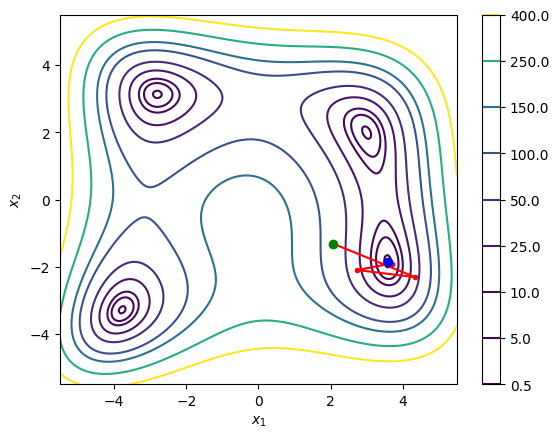


Función de Beale:
Resultado para x0 = [2. 3.], f(x0) = 3347.203125:
xk = [2.99998551 0.49999649], k = 78, f(xk) = 3.377431164632188e-11, convergió: True
Numero de reinicios = 65
Secuencia de puntos: [[-1.08056640625, -3.21044921875], [1.7385279788790102, -0.5167037007758362], [1.6702182133704837, 0.19049842256335625], [2.0943612184475393, -0.01708745755063787], [2.1058410909975263, 0.3154047253054244], [2.221501652846917, 0.1953473151416435], [2.368756293476698, 0.41215856611692714], [2.3687562934766984, 0.41215856611692736], [2.455157970829864, 0.2473934610771858], [2.441484913115475, 0.350791885259172]]


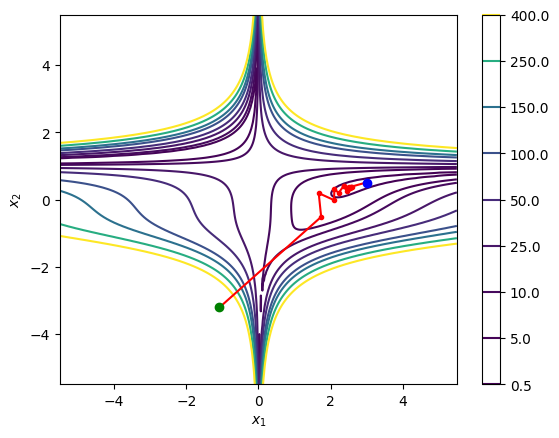


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ], f(x0) = 24.199999999999996:
xk = [1.00002802 1.0000563 ], k = 4999, f(xk) = 7.91905382065622e-10, convergió: False
Numero de reinicios = 4248
Secuencia de puntos: [[-0.9894531249999999, 1.0859375], [-1.0643320904579014, 1.0441718697547913], [-1.0234514645128605, 1.0614825980797318], [-1.0267651031888638, 1.0560022473507424], [-1.0202563808475194, 1.0553164386693736], [-1.0238373428835006, 1.0496940339782426], [-1.0170924472957374, 1.0491271865971896], [-1.0208542322682348, 1.0434044755615814], [-1.0139660606926788, 1.0429118536781383], [-1.0178108535804755, 1.037136587490049]]


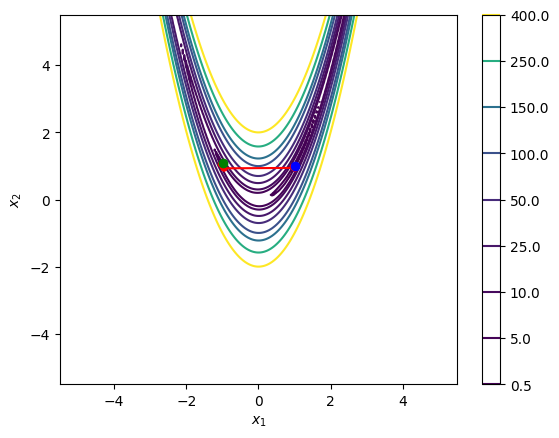


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 4597.999999999999:
xk = [1.         1.         1.         1.         1.         1.
 1.         1.         1.00000001 1.00000001 1.00000005 1.0000001
 1.00000022 1.00000043 1.00000089 1.00000179 1.0000036  1.00000721
 1.00001447 1.00002901], k = 901, f(xk) = 2.7951561064734645e-10, convergió: True
Numero de reinicios = 738

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 9680.0:
xk = [1.00000001 1.00000001 1.00000001 1.00000001 1.00000001 1.00000001
 1.         1.         1.         0.99999999 0.99999999 0.99999998
 0.99999998 0.99999998 0.99999998 0.99999997 0.99999998 0.99999997
 0.99999998 0.99999998 0.99999998 0.99999998 0.99999999 0.99999999
 1.         1.         1.000000

In [11]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(40)])
]
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001
c2 = 0.01

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 500

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, gk, k, convergio, secuencia, nr = ConjugateGrad_NLineal_FR(x0, func, grad_func, NMax, tau(len(x0)), alpha_0, rho, c1, c2, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        print(f"Numero de reinicios = {nr}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_descenso_maximo(himmelblau, grad_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)


#### **Gradiente conjugado no lineal con el método NCG**

In [25]:
# Función NCG
def ncg_method(f, grad_f, x0, B, epsilon, max_iter, k1, k2, m):
    def cls2_line_search(x, p, f_value, grad, nu):
        alpha = 1.0
        beta = 0.02
        Q = 2.0
        max_alpha_iter = 100
        alpha_iter = 0
        first = True
        first_ok = False
        alpha1 = alpha
        f1 = f_value

        while True:
            new_x = x + alpha * p
            new_f_value = f(new_x)
            mu = (f_value - new_f_value) / (alpha * nu)

            if mu * abs(mu - 1) >= beta:
                if first:
                    alpha1 = alpha
                    f1 = new_f_value
                else:
                    break
                first_ok = True
            else:
                if first_ok and not first:
                    alpha = alpha1
                    new_f_value = f1
                    break

            if mu > 0.5:
                alpha = alpha
            elif alpha == 1e-8:
                break
            else:
                alpha = alpha

            if first:
                first = False
                if mu < 1:
                    alpha = 0.5 * alpha / (1 - mu)
                else:
                    alpha = Q * alpha
            else:
                if alpha == float('inf'):
                    alpha = Q * alpha
                elif alpha == 0:
                    alpha = 0.5 * alpha / (1 - mu)
                else:
                    alpha = np.sqrt(alpha * alpha)

            alpha = min(alpha, 1e8)
            alpha_iter += 1
            if alpha_iter > max_alpha_iter or alpha < 1e-8:
                break

        return alpha

    def restart_conditions_met(g, p, omega, k1, k2, nu):
        condition1 = omega > k1 * (omega - 2 * np.dot(h.T, g) + omega)
        condition2 = np.dot(p.T, g) + nu > k2 * np.linalg.norm(p)
        return condition1 or condition2

    x = x0
    points = [x.copy()]
    g = grad_f(x)
    h = np.linalg.solve(B, g)
    omega = np.dot(g, h)
    n_cg = 0
    nu = omega

    for _ in range(max_iter):
        if omega <= epsilon ** 2:
            break

        if _ == 0 or restart_conditions_met(g, p, omega, k1, k2, nu) or n_cg >= m:
            p = -h
            n_cg = 0
        else:
            lambda_ = (nu + np.dot(g, p)) / omega
            p = p - lambda_ * h
            n_cg += 1

        alpha = cls2_line_search(x, p, f(x), g, nu)
        x = x + alpha * p
        points.append(x.copy())
        f_value = f(x)

        g_old = g
        g = grad_f(x)
        h = np.linalg.solve(B, g)
        omega = np.dot(g, h)

        if restart_conditions_met(g, g_old, omega, k1, k2, nu):
            nu = omega
            p = -h

    return x, points



Solución: [ 3.5844284  -1.84812652]
Pasos: 39


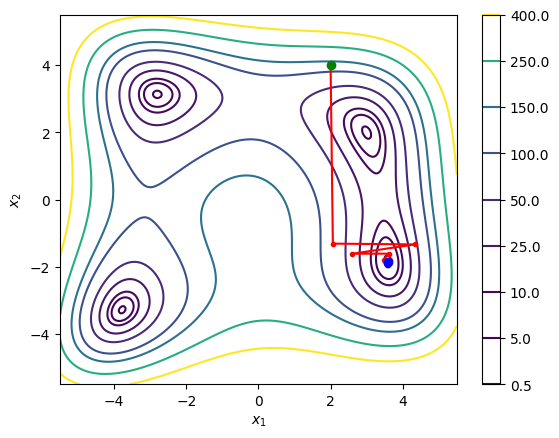

Solución: [2.9999992  2.00000165]
Pasos: 131


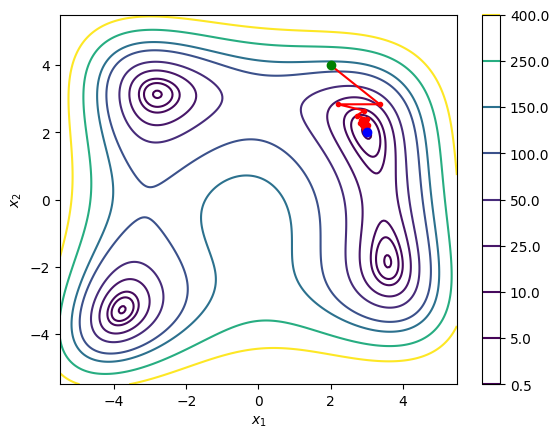

In [26]:
# Parámetros
x0 = np.array([2.0, 4.0])
B = np.eye(2)
epsilon = np.finfo(float).eps
Tol= np.sqrt(2) * epsilon_m**(1/3)
max_iter = 5000
k1 = 1
k2 = 10
m = 2*(2)+10

# Ejecución del algoritmo
solution, points = ncg_method(himmelblau, grad_himmelblau, x0, B, Tol, max_iter, k1, k2, m)
print("Solución:", solution)
print("Pasos:", len(points))
contornosFnc2D(himmelblau, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=points)


# Ejecución del algoritmo
B = hessian_himmelblau(x0)
solution, points = ncg_method(himmelblau, grad_himmelblau, x0, B, Tol, max_iter, k1, k2, m)
print("Solución:", solution)
print("Pasos:", len(points))
contornosFnc2D(himmelblau, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=points)


Solución: [2.99997985 0.49999507]
Pasos: 650


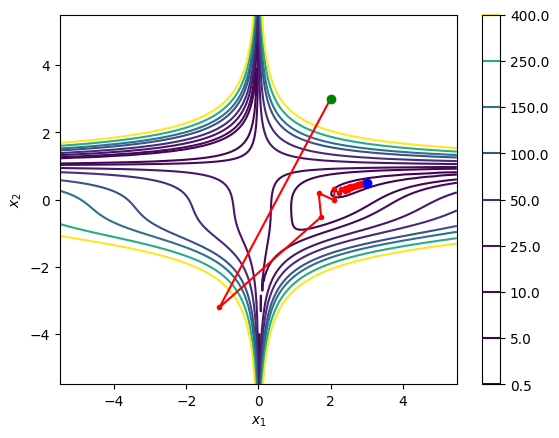

Solución: [3.54487029e-05 1.00001354e+00]
Pasos: 3595


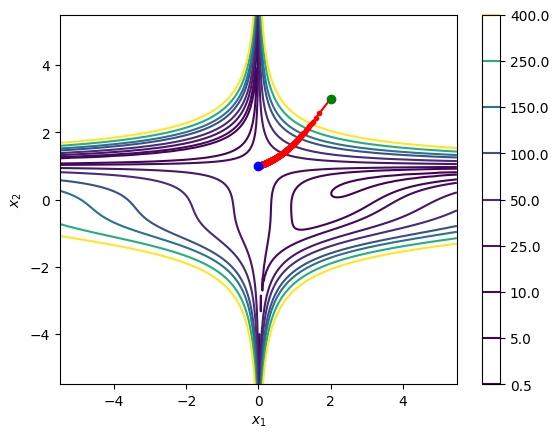

In [27]:
# Parámetros
x0 = np.array([2.0, 3.0])
B = np.eye(2)
epsilon = np.finfo(float).eps
Tol= np.sqrt(2) * epsilon_m**(1/3)
max_iter = 5000
k1 = 1
k2 = 10
m = 2*(2)+10

# Ejecución del algoritmo
solution, points = ncg_method(beale, grad_beale, x0, B, Tol, max_iter, k1, k2, m)
print("Solución:", solution)
print("Pasos:", len(points))
contornosFnc2D(beale, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=points)


# Ejecución del algoritmo
B = hessian_beale(x0)
solution, points = ncg_method(beale, grad_beale, x0, B, Tol, max_iter, k1, k2, m)
print("Solución:", solution)
print("Pasos:", len(points))
contornosFnc2D(beale, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=points)


Solución: [1.0000068  1.00001361]
Pasos: 9007


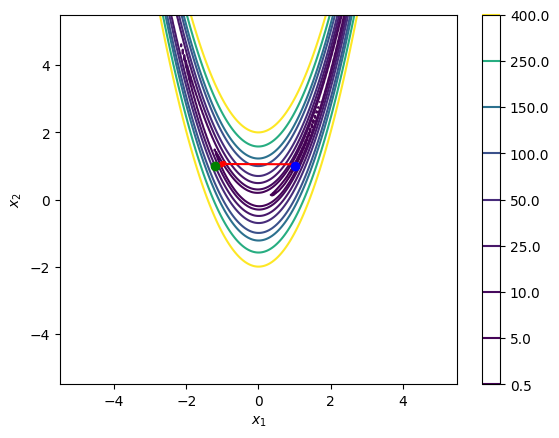

Solución: [0.78559413 0.61658625]
Pasos: 10001


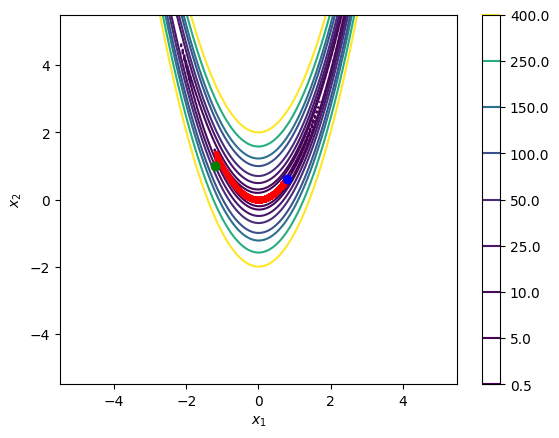

In [30]:
# Parámetros
x0 = np.array([-1.2, 1.0])
B = np.eye(2)
epsilon = np.finfo(float).eps
Tol= np.sqrt(2) * epsilon_m**(1/3)
max_iter = 10000
k1 = 1
k2 = 10
m = 2*(2)+10

# Ejecución del algoritmo
solution, points = ncg_method(rosenbrock, grad_rosenbrock, x0, B, Tol, max_iter, k1, k2, m)
print("Solución:", solution)
print("Pasos:", len(points))
contornosFnc2D(rosenbrock, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=points)


# Ejecución del algoritmo
B = hessian_rosenbrock(x0)
solution, points = ncg_method(rosenbrock, grad_rosenbrock, x0, B, Tol, max_iter, k1, k2, m)
print("Solución:", solution)
print("Pasos:", len(points))
contornosFnc2D(rosenbrock, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=points)


## Conclusión

En este trabajo, hemos explorado y analizado el artículo "Globally linearly convergent nonlinear conjugate gradients without Wolfe line search" de Arnold Neumaier, Morteza Kimiaei y Behzad Azmi, el cual presenta un nuevo enfoque para los métodos de gradiente conjugado no lineal. Este nuevo método, denominado NCG-basic, aborda algunas de las limitaciones inherentes a los métodos tradicionales al introducir una medida de zigzagging y una condición de reinicio innovadora.

Probamos el algoritmo en las funciones clásicas de optimización, Himmelblau, Bale y Rosenbrook, obteniendo resultados de convergencia en casi todas las pruebas y mejorando las iteraciones, ya que en principio al reducir la medida del zigzaging, el número de iteraciones también debería disminuir. Sin embargo en algunas otras pruebas no encontramos una reducción del número de iteraciones, esto puede ser debido al punto inicial, o que las condiciones de Wolfe tienen un peso importante en la aceleración de la convergencia del algoritmo. 

## Bibliografia

[1] Neumaier, Arnold, Morteza Kimiaei, and Behzad Azmi. "Globally linearly convergent nonlinear conjugate gradients without Wolfe line search." Numerical Algorithms (2024): 1-27.

[2] Nocedal, Jorge, and Stephen J. Wright, eds. Numerical optimization. New York, NY: Springer New York, 1999.

[3] Boyd, Stephen P., and Lieven Vandenberghe. Convex optimization. Cambridge university press, 2004.